In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams ["figure.figsize"]=(20,10)

In [2]:
df=pd.read_csv (r"C:\YASH\Yash DSAI\ML\Bengaluru_House_Data.csv")

In [3]:
df.head ()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby ("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1=df.drop(["area_type","availability","society","balcony"],axis="columns")

In [7]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df2["bhk"]= df2["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\SMRC\AppData\Local\Temp\ipykernel_6088\188500260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"]= df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [13]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def convert_to_float (x):
    try:
        tokens=x.split("-")
        if len(tokens)==2:
            return (float(tokens[0])+float(tokens[1]))/2
        return float(x)
    except:
        return None

In [17]:
df3=df2.copy()

In [18]:
df3["total_sqft"]=df3["total_sqft"].apply(convert_to_float)

In [19]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [20]:
df3.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [21]:
df4=df3.copy()

In [22]:
df4["price_per_sqft"]=df4["price"]*100000 / df4["total_sqft"]

In [23]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df4["location"].unique())

1304

In [29]:
df4["location"]=df4["location"].apply(lambda x: x.strip())

In [26]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)


In [31]:
loc_stat=df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
print(loc_stat)

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [32]:
len(loc_stat[loc_stat<10])

1039

In [33]:
loc_lessThan_10= loc_stat[loc_stat<10]
print(loc_lessThan_10)

location
2nd Phase JP Nagar                                    9
Volagerekallahalli                                    9
Yemlur                                                9
4th Block Koramangala                                 9
Lingarajapuram                                        9
Medahalli                                             9
Kaverappa Layout                                      9
Gollahalli                                            9
Richmond Town                                         9
Vishwanatha Nagenahalli                               9
Chennammana Kere                                      9
KUDLU MAIN ROAD                                       9
Banagiri Nagar                                        9
Peenya                                                9
Ejipura                                               9
Vignana Nagar                                         9
Mathikere                                             9
Chandra Layout                         

In [34]:
df4["location"]=df4["location"].apply(lambda x: "other" if x in loc_lessThan_10 else x )

In [35]:
df4.groupby("location")["location"].agg("count")

location
1st Block Jayanagar              14
1st Block Koramangala            10
1st Phase JP Nagar               25
2nd Phase Judicial Layout        11
2nd Stage Nagarbhavi             24
5th Block Hbr Layout             12
5th Phase JP Nagar               39
6th Phase JP Nagar               23
7th Phase JP Nagar              149
8th Phase JP Nagar               57
9th Phase JP Nagar               43
AECS Layout                      12
Abbigere                         24
Akshaya Nagar                    62
Ambalipura                       27
Ambedkar Nagar                   31
Amruthahalli                     24
Anandapura                       27
Ananth Nagar                     30
Anekal                           36
Anjanapura                       16
Ardendale                        24
Arekere                          17
Attibele                         42
BEML Layout                      13
BTM 1st Stage                    10
BTM 2nd Stage                    29
BTM Layout         

In [36]:
df4[df4["total_sqft"]/df4["bhk"]<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [37]:
df5=df4[~(df4["total_sqft"]/df4["bhk"]<300)]

In [38]:
df5.shape

(12502, 7)

In [39]:
df5["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
def remove_pop_outliers(dataframe):
    df_out=pd.DataFrame()
    for key, subdf in dataframe.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6=remove_pop_outliers(df5)

In [41]:
df6.shape

(10222, 7)

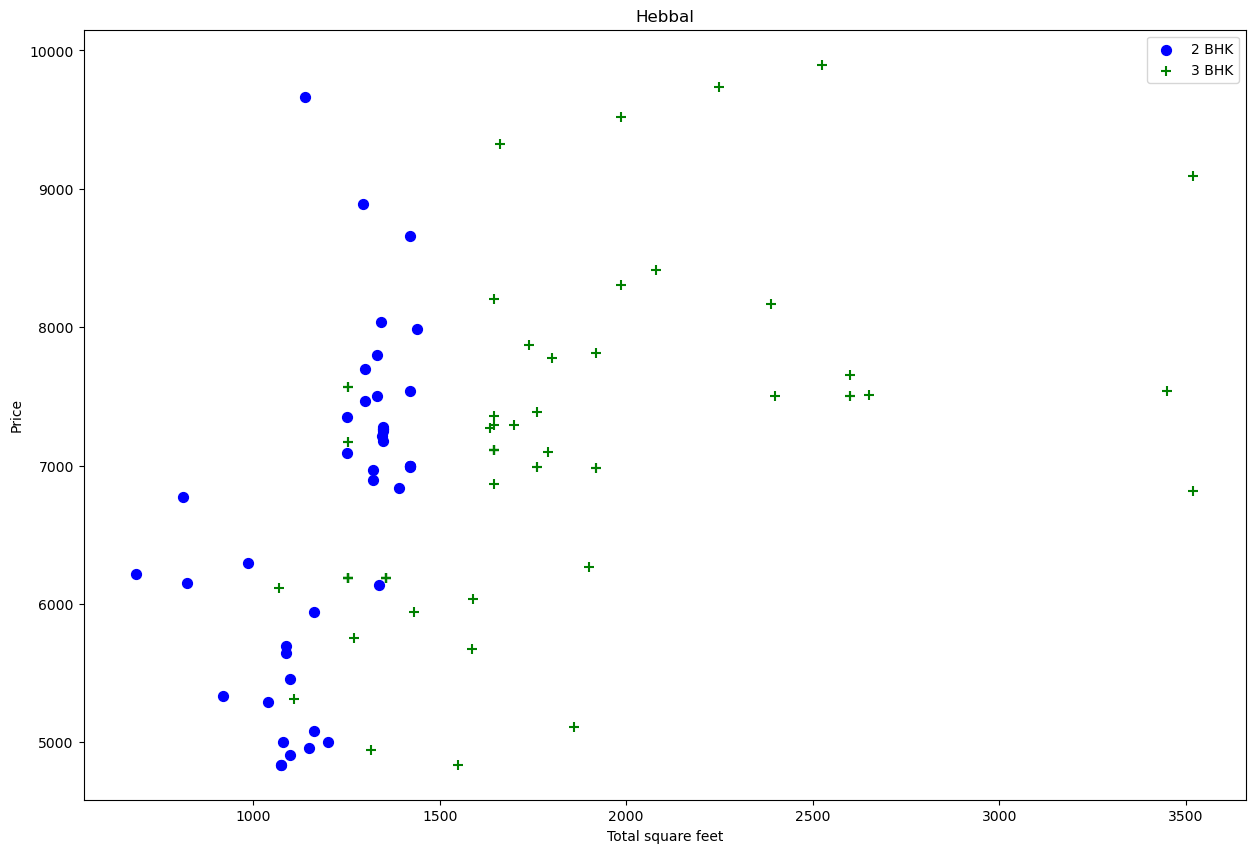

In [46]:
def plot_scatter_chart (dataframe, location):
    bhk2=dataframe[(dataframe["location"]==location) &(dataframe["bhk"]==2)]
    bhk3=dataframe[(dataframe["location"]==location) & (dataframe["bhk"]==3)]
    matplotlib.rcParams ["figure.figsize"]=(15,10)
    plt.scatter(bhk2["total_sqft"],bhk2["price_per_sqft"],color="blue",label="2 BHK", s=50)
    plt.scatter(bhk3["total_sqft"],bhk3["price_per_sqft"],marker="+",color="green",label="3 BHK",s=50)
    plt.xlabel("Total square feet")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Hebbal")

In [43]:
def remove_bhk_outliers (dataframe):
    exclude_indices=np.array([])
    for location,location_df in dataframe.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dataframe.drop(exclude_indices,axis='index')

df7=remove_bhk_outliers(df6)
df7.shape

(7369, 7)

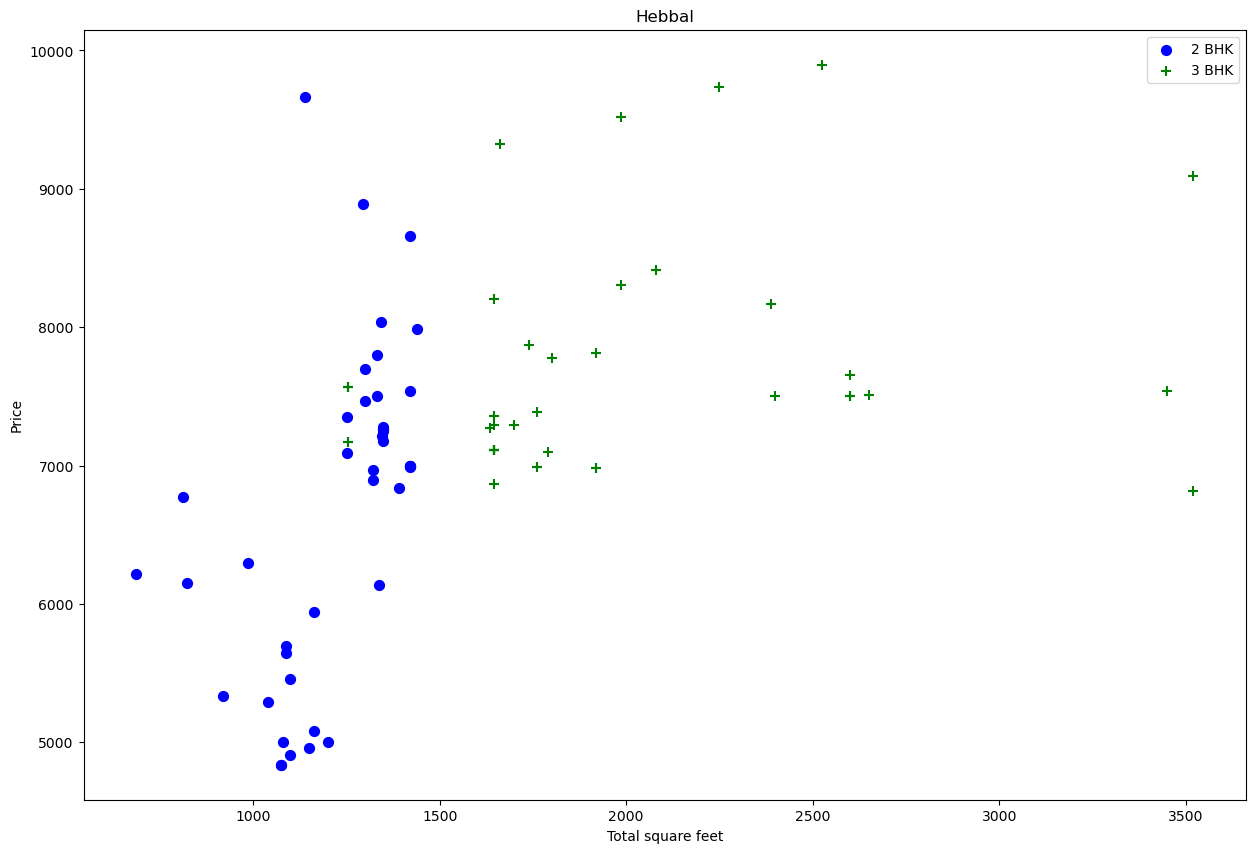

In [47]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

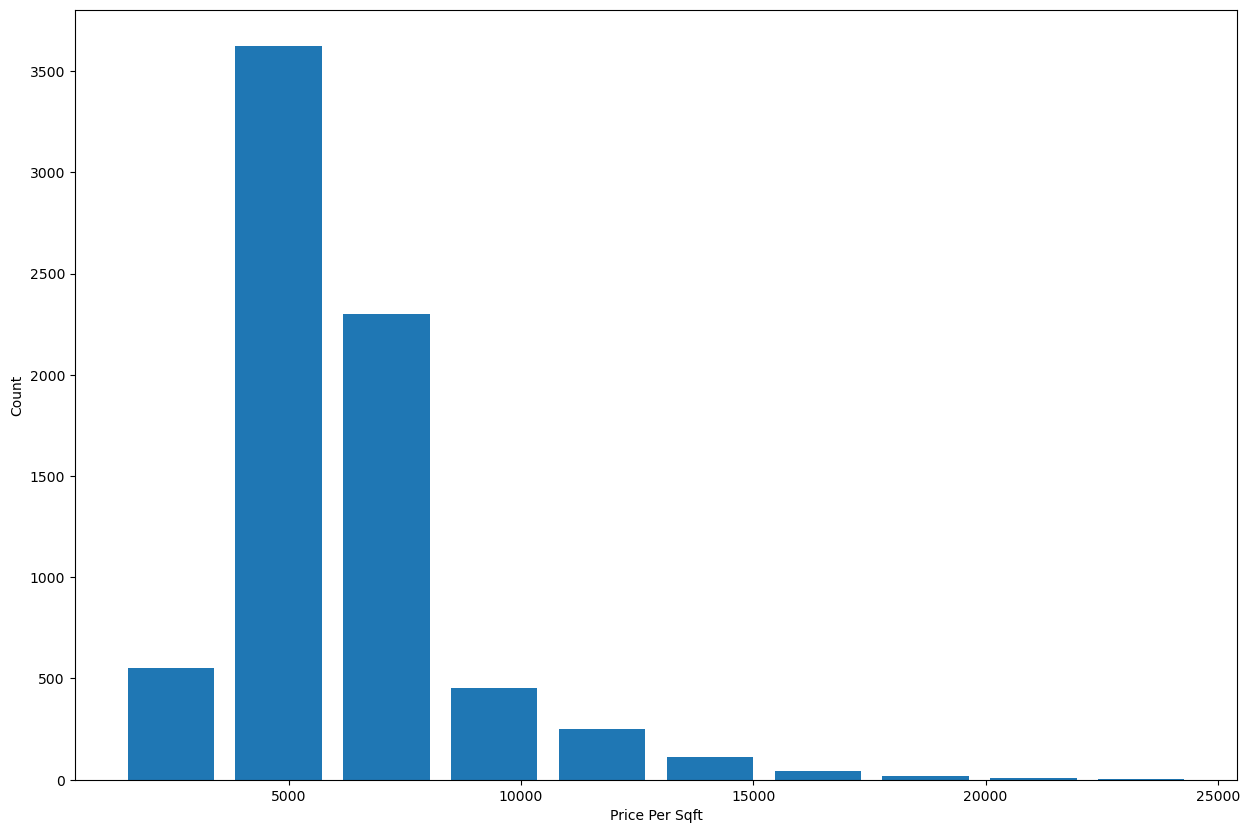

In [48]:
matplotlib.rcParams ["figure.figsize"]=(15,10)
plt.hist(df7["price_per_sqft"],rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")

In [50]:
df7["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [51]:
df7[df7["bath"]>df7["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [52]:
df7.shape

(7369, 7)

In [55]:
df8=df7[df7["bath"]<df7["bhk"]+2]
df8.shape

(7291, 7)

In [58]:
#dfcopy2=dfcopy[~(dfcopy["bath"] > dfcopy["bhk"]+2)] 

In [61]:
df9= df8.drop(["size","price_per_sqft"],axis="columns")

In [62]:
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [67]:
df10 = pd.get_dummies(df9['location']).astype(int)


In [68]:
df10.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df11=pd.concat([df9,df10.drop('other',axis='columns')],axis='columns')

In [72]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df12=df11.drop('location',axis='columns')

In [74]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df12.shape

(7291, 258)

In [76]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y=df12['price']

In [78]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [82]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [83]:
model.fit(X_train,y_train)

LinearRegression()

In [84]:
model.score(X_test,y_test)

0.8556662450161905

In [85]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [86]:
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [87]:
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

In [88]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [102]:
def find_best_model_using_gridsearchcv(X,y):
    algos ={
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                #'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
#find_best_model_using_gridsearchcv(X,y)

In [103]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\SMRC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SMRC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SMRC\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\SMRC\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\SMRC\anaconda3\Lib\site-packages\sklea

,model,best_score,best_params
0,linear_regression,0.853445,{}
1,lasso,0.703370,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.692885,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [105]:
def price_prediction(location,sqft,bath,bhk):
    loc_index=np.where(X_columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [107]:

X_columns = X.columns
#price_prediction('1st Phase JP Nagar',1000,2,2)

In [108]:
price_prediction('1st Phase JP Nagar',1000,2,2)

C:\Users\SMRC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.10543612135704

In [109]:
price_prediction('1st Phase JP Nagar',1000,3,3)

C:\Users\SMRC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.39878275521973

In [110]:
import pickle
with open('Banglore_Home_Prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [111]:
import json
columns={
    'data_columns':[col.lower()for col in X.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))